In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import csv
import pandas as pd
import numpy as np

# Logistic Regression
### Data Pre-Processing

In [2]:
df = pd.read_csv("school_shooting_merge.csv")

print(df.columns)
print(len(df))
df.head()
len(df)

Index(['gsId', 'name', 'old name', 'matching', 'shoot', 'type',
       'gradeCategory', 'gradeRange', 'enrollment', 'parentRating', 'gsRating',
       'district', 'districtId', 'districtNCESId', 'ncesId', 'address', 'city',
       'gsID_census', 'Asian', 'Black, non-Hispanic', 'Hispanic',
       'Multiracial', 'Native American or Native Alaskan',
       'Native Hawaiian or Other Pacific Islander', 'White, non-Hispanic',
       'actSatNumberParticipation', 'apCourseParticipation', 'apCoursePassed',
       'freeAndReducedPriceLunch', 'idea', 'percentTeachersInFirstSecondYear',
       'plan504'],
      dtype='object')
15750


15750

In [3]:
df_select=df[['type','gradeCategory','enrollment','parentRating','gsRating','districtId',
             'Asian', 'Black, non-Hispanic', 'Hispanic','Multiracial', 'Native American or Native Alaskan',
            'Native Hawaiian or Other Pacific Islander', 'White, non-Hispanic',
            'actSatNumberParticipation', 'apCourseParticipation', 'apCoursePassed',
       'freeAndReducedPriceLunch', 'idea', 'percentTeachersInFirstSecondYear','plan504','shoot']]

df_dropna = df_select.dropna()

print(df_dropna.dtypes)

print(len(df_dropna))

df_dropna.head()

type                                          object
gradeCategory                                 object
enrollment                                     int64
parentRating                                   int64
gsRating                                       int64
districtId                                     int64
Asian                                        float64
Black, non-Hispanic                          float64
Hispanic                                     float64
Multiracial                                  float64
Native American or Native Alaskan            float64
Native Hawaiian or Other Pacific Islander    float64
White, non-Hispanic                          float64
actSatNumberParticipation                    float64
apCourseParticipation                        float64
apCoursePassed                               float64
freeAndReducedPriceLunch                     float64
idea                                         float64
percentTeachersInFirstSecondYear             f

,type,gradeCategory,enrollment,parentRating,gsRating,districtId,Asian,"Black, non-Hispanic",Hispanic,Multiracial,...,Native Hawaiian or Other Pacific Islander,"White, non-Hispanic",actSatNumberParticipation,apCourseParticipation,apCoursePassed,freeAndReducedPriceLunch,idea,percentTeachersInFirstSecondYear,plan504,shoot
0,public,12-Sep,1853,4,9,1,45.63,6.52,11.87,3.96,...,0.76,31.08,1071.0,46.8,885.0,18.16,8.8,7.9,1.5,0
1,public,K-8,591,5,9,1,39.42,3.05,13.03,16.07,...,0.51,27.92,1071.0,46.8,885.0,6.26,10.1,4.2,0.0,0
2,public,K-5,622,5,9,1,39.23,3.70,14.31,16.24,...,0.16,26.21,1071.0,46.8,885.0,7.40,8.5,11.1,1.7,0
3,public,K-5,478,4,9,1,14.23,1.88,13.39,12.97,...,0.00,57.11,1071.0,46.8,885.0,11.30,8.4,0.0,0.0,0
4,public,12-Jun,1336,4,6,1,35.63,17.51,16.69,6.66,...,1.42,21.78,178.0,46.8,885.0,40.34,10.9,1.8,2.0,0


In [4]:
df_dropna['gradeCategory'].value_counts()

K-5       5043
12-Sep    1824
K-8       1396
8-Jun     1289
K-12      1202
12-Jun     412
K          117
PK           1
Name: gradeCategory, dtype: int64

In [20]:
df_dummies=pd.get_dummies(data=df_dropna,columns=['type','gradeCategory'])
print(df_dummies.columns)
# print(df_dummies.describe())
print(df_dummies.head())
df_dummies.shape

Index(['enrollment', 'parentRating', 'gsRating', 'districtId', 'Asian',
       'Black, non-Hispanic', 'Hispanic', 'Multiracial',
       'Native American or Native Alaskan',
       'Native Hawaiian or Other Pacific Islander', 'White, non-Hispanic',
       'actSatNumberParticipation', 'apCourseParticipation', 'apCoursePassed',
       'freeAndReducedPriceLunch', 'idea', 'percentTeachersInFirstSecondYear',
       'plan504', 'shoot', 'type_charter', 'type_private', 'type_public',
       'gradeCategory_12-Jun', 'gradeCategory_12-Sep', 'gradeCategory_8-Jun',
       'gradeCategory_K', 'gradeCategory_K-12', 'gradeCategory_K-5',
       'gradeCategory_K-8', 'gradeCategory_PK'],
      dtype='object')
   enrollment  parentRating  gsRating  districtId  Asian  Black, non-Hispanic  \
0        1853             4         9           1  45.63                 6.52   
1         591             5         9           1  39.42                 3.05   
2         622             5         9           1  39.23   

(11284, 30)

In [23]:
df.shoot.value_counts()

0    15714
1       36
Name: shoot, dtype: int64

In [6]:
# Assign X (data) and y (target)

X = df_dummies.drop(columns=['shoot'])
print(X.shape)
X.head()

(11284, 29)


,enrollment,parentRating,gsRating,districtId,Asian,"Black, non-Hispanic",Hispanic,Multiracial,Native American or Native Alaskan,Native Hawaiian or Other Pacific Islander,...,type_private,type_public,gradeCategory_12-Jun,gradeCategory_12-Sep,gradeCategory_8-Jun,gradeCategory_K,gradeCategory_K-12,gradeCategory_K-5,gradeCategory_K-8,gradeCategory_PK
0,1853,4,9,1,45.63,6.52,11.87,3.96,0.17,0.76,...,0,1,0,1,0,0,0,0,0,0
1,591,5,9,1,39.42,3.05,13.03,16.07,0.00,0.51,...,0,1,0,0,0,0,0,0,1,0
2,622,5,9,1,39.23,3.70,14.31,16.24,0.16,0.16,...,0,1,0,0,0,0,0,1,0,0
3,478,4,9,1,14.23,1.88,13.39,12.97,0.42,0.00,...,0,1,0,0,0,0,0,1,0,0
4,1336,4,6,1,35.63,17.51,16.69,6.66,0.30,1.42,...,0,1,1,0,0,0,0,0,0,0


In [30]:
# YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY
y = df_dropna.shoot

In [31]:
# Split the data using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y) # split to keep ratio of y value

In [32]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
# Fit the model to the data
classifier.fit(X_train, y_train)

C:\Users\soyou\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
# Validate the model using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9968096419709322
Testing Data Score: 0.9968096419709322


In [35]:
# Make predictions using the X_test and y_test data
# Print at least 10 predictions vs their actual labels
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")
preds=pd.DataFrame({"Prediction": predictions, "Actual": y_test})
                    # use .reset_index(drop=True) to drop index
preds.head()

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


,Prediction,Actual
3091,0,0
1650,0,0
5179,0,0
4256,0,0
13415,0,0


In [ ]:
# .to_csv('.csv',index=False)

# Decision Tree

In [36]:
from sklearn import tree
target = df_dropna['shoot']
target_names = ['no shoot','shoot']

data = df_dummies.drop(columns=['shoot'])
feature_names= data.columns

# Create a Decision Tree Classifier
clf_traintest = tree.DecisionTreeClassifier() # clf - classifier
# Fit the classifier to the data
clf_traintest = clf_traintest.fit(X_train, y_train)
# score
clf_traintest.score(X_test,y_test)

0.9946827366182205

In [37]:
# for visualization I used the whole dataset
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, target)

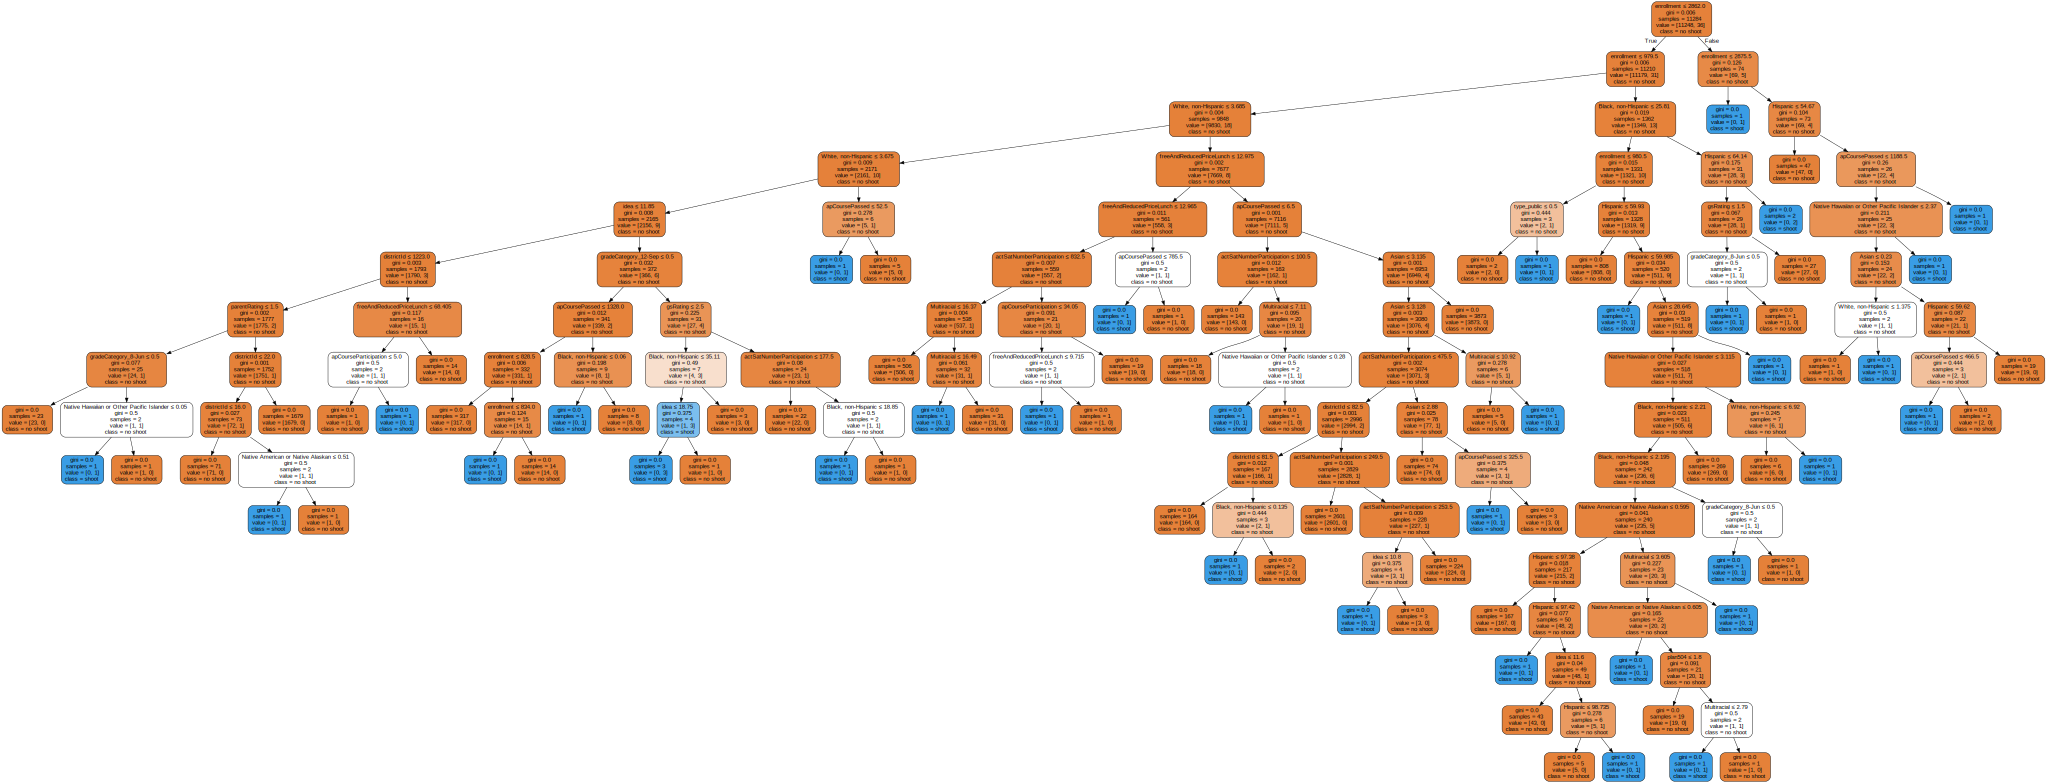

In [39]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')

graph = graphviz.Source(dot_data)  
graph 

# Random Forrest

In [40]:
# Create, fit, and score a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # more number of estimators, possibility of overfitting
rf = rf.fit(X_train, y_train)

In [41]:
rf.score(X_test, y_test)

0.9968096419709322

In [42]:
importances = rf.feature_importances_
importances

array([9.95498722e-02, 1.62651167e-02, 2.68368229e-02, 3.36535948e-02,
       6.76798078e-02, 6.75026504e-02, 7.98894438e-02, 6.21877125e-02,
       4.60849858e-02, 4.51504836e-02, 8.06576204e-02, 5.01627737e-02,
       3.88804372e-02, 4.70549270e-02, 7.00559376e-02, 5.24950611e-02,
       4.30678409e-02, 3.92288204e-02, 3.61865547e-03, 2.46032367e-04,
       4.64983132e-03, 0.00000000e+00, 1.44353455e-02, 3.64212755e-03,
       0.00000000e+00, 4.22618716e-04, 6.57901429e-03, 2.46586810e-06,
       0.00000000e+00])

In [43]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.0995498722115532, 'enrollment'),
 (0.08065762035957752, 'White, non-Hispanic'),
 (0.07988944381894601, 'Hispanic'),
 (0.07005593763263901, 'freeAndReducedPriceLunch'),
 (0.06767980779697243, 'Asian'),
 (0.06750265036942618, 'Black, non-Hispanic'),
 (0.06218771245752061, 'Multiracial'),
 (0.05249506105965664, 'idea'),
 (0.05016277373519484, 'actSatNumberParticipation'),
 (0.04705492704221747, 'apCoursePassed'),
 (0.046084985839316174, 'Native American or Native Alaskan'),
 (0.04515048362477381, 'Native Hawaiian or Other Pacific Islander'),
 (0.04306784091296394, 'percentTeachersInFirstSecondYear'),
 (0.03922882036476941, 'plan504'),
 (0.03888043724186785, 'apCourseParticipation'),
 (0.033653594828978055, 'districtId'),
 (0.02683682287569884, 'gsRating'),
 (0.016265116737451964, 'parentRating'),
 (0.014435345502349348, 'gradeCategory_12-Sep'),
 (0.006579014291864706, 'gradeCategory_K-5'),
 (0.004649831322491474, 'type_public'),
 (0.003642127551674786, 'gradeCategory_8-Jun'),
 (0.0036

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# SVM

In [44]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [45]:
# Print the model score using the test data
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.997


In [47]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=["no shoot", "shoot"]))

              precision    recall  f1-score   support

    no shoot       1.00      1.00      1.00      2812
       shoot       0.00      0.00      0.00         9

   micro avg       1.00      1.00      1.00      2821
   macro avg       0.50      0.50      0.50      2821
weighted avg       0.99      1.00      1.00      2821



C:\Users\soyou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Deep Learning

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

In [ ]:
# Create an empty sequential model
model = Sequential()

In [ ]:
# Add the first layer where the input dimensions are the 561 columns of the training data
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

In [ ]:
# The output layer has 13 columns that are one-hot encoded
y_train.shape